In [1]:
import numpy as np
import pandas as pd
import csv
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
dataset_path = "all_reviews_fulldataset.csv" # use your own path
data_df = pd.read_csv(dataset_path)
data_df.head()

,Airline,Review ID,Date Published,Overall Rating,Passenger Country,Trip Verified,Review Title,Review,Aircraft,Type Of Traveller,...,Layover,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Wifi & Connectivity,Value For Money,Recommended,Inflight Entertainment
0,scoot,891669,26/3/2024,3.0,Australia,Not Verified,"""not recommend flying Scoot""",My flight to Singapore was uneventful as usual...,Boeing 787,Solo Leisure,...,NaN,Feb-24,1.0,3.0,1.0,3.0,2.0,3.0,no,NaN
1,scoot,891535,24/3/2024,1.0,Malaysia,Trip Verified,"""whole cabin is like sauna""",Using super old plane. Aircon was blowing warm...,NaN,Solo Leisure,...,NaN,Mar-24,1.0,3.0,2.0,3.0,NaN,2.0,no,1.0
2,scoot,891527,24/3/2024,9.0,Singapore,Trip Verified,"""professional, helpful and friendly""","I travelled with my sister, my elderly parent ...",NaN,Family Leisure,...,NaN,Mar-24,4.0,5.0,4.0,5.0,NaN,5.0,yes,NaN
3,scoot,891411,22/3/2024,7.0,United States,Trip Verified,"""seat pitch is generous and comfortable""",Was assigned last two row at seat 39F with the...,A321 NEO,Solo Leisure,...,NaN,Mar-24,5.0,3.0,NaN,2.0,2.0,5.0,yes,NaN
4,scoot,891340,21/3/2024,4.0,Australia,Trip Verified,"""Very rude male flight attendant""",Very rude male flight attendant. Accessed the ...,A321,Family Leisure,...,NaN,Mar-24,3.0,1.0,NaN,4.0,NaN,4.0,no,NaN


In [3]:
filtered_data_df = data_df[['Date Published', 'Review', 'Recommended']].copy()
filtered_data_df

,Date Published,Review,Recommended
0,26/3/2024,My flight to Singapore was uneventful as usual...,no
1,24/3/2024,Using super old plane. Aircon was blowing warm...,no
2,24/3/2024,"I travelled with my sister, my elderly parent ...",yes
3,22/3/2024,Was assigned last two row at seat 39F with the...,yes
4,21/3/2024,Very rude male flight attendant. Accessed the ...,no
...,...,...,...
4112,28/5/2012,SYD-OOL. Arrived at the airport on time. Fligh...,no
4113,25/5/2012,Cairns-Sydney-Phuket in Business class. Was no...,no
4114,21/5/2012,Had the misfortune of flying Business class fr...,no
4115,15/5/2012,I have just flown from Melbourne to Sydney and...,no


C:\Users\jared\AppData\Local\Temp\ipykernel_11336\2318753317.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  filtered_data_df['Year'] = pd.to_datetime(filtered_data_df['Date Published']).dt.year


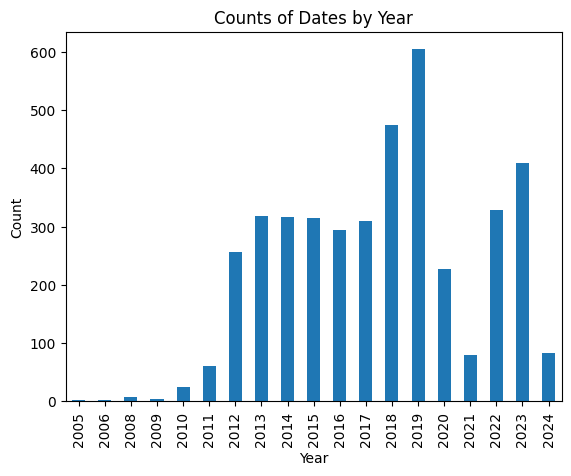

In [4]:
# Extract year and month from the 'Date Published' column
filtered_data_df['Year'] = pd.to_datetime(filtered_data_df['Date Published']).dt.year

# Count occurrences by year-month
year_month_counts = filtered_data_df['Year'].value_counts()

# Sort year_month_counts by index in descending order
year_month_counts = year_month_counts.sort_index(ascending=True)

# Create a bar chart
year_month_counts.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Counts of Dates by Year')
plt.show()

In [5]:
filtered_data_df.head()

,Date Published,Review,Recommended,Year
0,26/3/2024,My flight to Singapore was uneventful as usual...,no,2024
1,24/3/2024,Using super old plane. Aircon was blowing warm...,no,2024
2,24/3/2024,"I travelled with my sister, my elderly parent ...",yes,2024
3,22/3/2024,Was assigned last two row at seat 39F with the...,yes,2024
4,21/3/2024,Very rude male flight attendant. Accessed the ...,no,2024


In [28]:
# identifying splits as follows: 2005-2016, then  2017-2019, then 2020-2024
# we check here to ensure the split is fairly even

# Define year ranges
ranges = [
    (2005, 2016),
    (2017, 2019),
    (2020, 2024)
]

# Create a dictionary to store counts
year_range_counts = {}
for year_start, year_end in ranges:
  # Filter data for the current year range
  temp_df = filtered_data_df[(filtered_data_df['Year'] >= year_start) & (filtered_data_df['Year'] <= year_end)]
  # Count occurrences
  count = len(temp_df)
  # Add count to the dictionary with range as key
  year_range_counts[f"{year_start}-{year_end}"] = count

# Calculate total count
total_count = len(filtered_data_df)

# Calculate percentages as a dictionary
percentages = {range_str: (count / total_count) * 100 for range_str, count in year_range_counts.items()}

# Create a DataFrame from the dictionary
percentages_df = pd.DataFrame.from_dict(percentages, orient='index', columns=['Percentage'])

# Reset index to convert it into a regular column
percentages_df = percentages_df.reset_index()

percentages_df.rename(columns={'index': 'Year Range'}, inplace=True)

# Print the DataFrame
percentages_df

,Year Range,Percentage
0,2005-2016,38.838960
1,2017-2019,33.713869
2,2020-2024,27.447170


In [29]:
# Define a list of names for the new column
column_names = ['base', 'time period 1', 'time period 2']

# Create a Series with the names as indices
new_column = pd.Series(column_names, index=percentages_df.index)

# Append the new column to the DataFrame
percentages_df = percentages_df.assign(Fragment=new_column.values)


# Print the updated DataFrame
percentages_df

,Year Range,Percentage,Fragment
0,2005-2016,38.838960,base
1,2017-2019,33.713869,time period 1
2,2020-2024,27.447170,time period 2


In [50]:
def clean_text(text):
    """
    Inner function for cleaning individual text entries.
    """
    replace_char=''
    return ''.join(char if char.isascii() else replace_char for char in text)

In [51]:
filtered_data_df['Cleaned_Review'] = filtered_data_df['Review'].apply(clean_text)

In [52]:
filtered_data_df.head()

,Date Published,Review,Recommended,Year,Cleaned_Review
0,26/3/2024,My flight to Singapore was uneventful as usual...,no,2024,My flight to Singapore was uneventful as usual...
1,24/3/2024,Using super old plane. Aircon was blowing warm...,no,2024,Using super old plane. Aircon was blowing warm...
2,24/3/2024,"I travelled with my sister, my elderly parent ...",yes,2024,"I travelled with my sister, my elderly parent ..."
3,22/3/2024,Was assigned last two row at seat 39F with the...,yes,2024,Was assigned last two row at seat 39F with the...
4,21/3/2024,Very rude male flight attendant. Accessed the ...,no,2024,Very rude male flight attendant. Accessed the ...


In [53]:
distinct_values = filtered_data_df['Recommended'].unique()
distinct_values

array(['no', 'yes'], dtype=object)

In [54]:
filtered_data_df['is_negative_sentiment'] = filtered_data_df['Recommended'].map({'yes': 0, 'no': 1})
filtered_data_df

,Date Published,Review,Recommended,Year,Cleaned_Review,is_negative_sentiment
0,26/3/2024,My flight to Singapore was uneventful as usual...,no,2024,My flight to Singapore was uneventful as usual...,1
1,24/3/2024,Using super old plane. Aircon was blowing warm...,no,2024,Using super old plane. Aircon was blowing warm...,1
2,24/3/2024,"I travelled with my sister, my elderly parent ...",yes,2024,"I travelled with my sister, my elderly parent ...",0
3,22/3/2024,Was assigned last two row at seat 39F with the...,yes,2024,Was assigned last two row at seat 39F with the...,0
4,21/3/2024,Very rude male flight attendant. Accessed the ...,no,2024,Very rude male flight attendant. Accessed the ...,1
...,...,...,...,...,...,...
4112,28/5/2012,SYD-OOL. Arrived at the airport on time. Fligh...,no,2012,SYD-OOL. Arrived at the airport on time. Fligh...,1
4113,25/5/2012,Cairns-Sydney-Phuket in Business class. Was no...,no,2012,Cairns-Sydney-Phuket in Business class. Was no...,1
4114,21/5/2012,Had the misfortune of flying Business class fr...,no,2012,Had the misfortune of flying Business class fr...,1
4115,15/5/2012,I have just flown from Melbourne to Sydney and...,no,2012,I have just flown from Melbourne to Sydney and...,1


In [55]:
train_test_df = filtered_data_df[['Year', 'Cleaned_Review', 'is_negative_sentiment']].copy()
train_test_df

,Year,Cleaned_Review,is_negative_sentiment
0,2024,My flight to Singapore was uneventful as usual...,1
1,2024,Using super old plane. Aircon was blowing warm...,1
2,2024,"I travelled with my sister, my elderly parent ...",0
3,2024,Was assigned last two row at seat 39F with the...,0
4,2024,Very rude male flight attendant. Accessed the ...,1
...,...,...,...
4112,2012,SYD-OOL. Arrived at the airport on time. Fligh...,1
4113,2012,Cairns-Sydney-Phuket in Business class. Was no...,1
4114,2012,Had the misfortune of flying Business class fr...,1
4115,2012,I have just flown from Melbourne to Sydney and...,1


In [57]:
# sotring data into base and time period files

# Define year ranges with descriptive names
ranges = {
    "base": (2005, 2016),  
    "time_period1": (2017, 2019),
    "time_period2": (2020, 2024)
}

# Function to filter and save data for a year range
def filter_and_save(data, year_range_name, year_start, year_end):
  filtered_df = data[(data['Year'] >= year_start) & (data['Year'] <= year_end)]
  filtered_df.to_csv(f"{year_range_name}.csv", index=False)

# Filter and save data for each range
for range_name, (year_start, year_end) in ranges.items():
  filter_and_save(train_test_df.copy(), range_name, year_start, year_end)

print("Data successfully filtered and saved to CSV files.")

Data successfully filtered and saved to CSV files.
